In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784") # 28*28 = 784
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X, y = dataset["data"], dataset["target"]

X = X / 255

In [4]:
y.shape

(70000,)

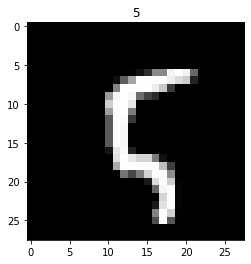

In [5]:
i = 100
img_1 = X[i,:].reshape(28,28)
plt.imshow(img_1, cmap='gray')
plt.title(y[i])
plt.show()

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
digits = 10
examples = 70000

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [27]:
Y_new.shape

(10, 70000)

In [11]:
Y_new[:,100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [13]:
y[0,100]

'5'

In [14]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

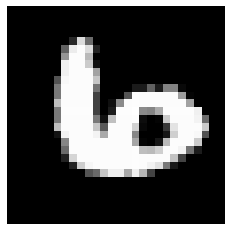

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [15]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = "gray")
plt.axis("off")
plt.show()
Y_train[:,i]

In [16]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [20]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [17]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [23]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  6.469537154879483
Epoch 100 cost:  0.7301696734537075
Epoch 200 cost:  0.5533529704890445
Epoch 300 cost:  0.47741716489538905
Epoch 400 cost:  0.4316794805385177
Epoch 500 cost:  0.3998794623352657
Epoch 600 cost:  0.3759010201664202
Epoch 700 cost:  0.35677440625617124
Epoch 800 cost:  0.34085820868774513
Epoch 900 cost:  0.3272072455683929
Epoch 1000 cost:  0.3152525175793287
Epoch 1100 cost:  0.3046224672147
Epoch 1200 cost:  0.2950602227746151
Epoch 1300 cost:  0.2863808744603306
Epoch 1400 cost:  0.2784446315935879
Epoch 1500 cost:  0.27114190364554136
Epoch 1600 cost:  0.2643862247946492
Epoch 1700 cost:  0.2581095621630287
Epoch 1800 cost:  0.2522565997254472
Epoch 1900 cost:  0.24677998333460582
Final cost: 0.2416886791829109


In [24]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 944    0   10    4    2   11   10    1    5    8]
 [   0 1111    2    0    1    2    1   15    4    7]
 [   2    5  933   25    7    4    5   18    7    3]
 [   6    2   26  916    0   38    2   10   24    4]
 [   2    0   13    1  903    6   14    8    9   37]
 [  10    2    6   33    7  783    9    1   27    9]
 [   8    2    9    1   10   13  909    0   14    2]
 [   3    2   13   11    2    4    3  939   10   24]
 [   5   10   19   17    8   19    5    3  860   11]
 [   0    1    1    2   42   12    0   33   14  904]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       995
           1       0.98      0.97      0.98      1143
           2       0.90      0.92      0.91      1009
           3       0.91      0.89      0.90      1028
           4       0.92      0.91      0.91       993
           5       0.88      0.88      0.88       887
           6       0.95      0.94      0.94       968
           7       0.91      0.93   